# Wstęp

In [ ]:
import numpy as np

y_true_mock = np.array([
    2,
    6,
    0.6,
    1,
])

y_pred_mock = np.array([
    2.2,
    2.5,
    3.5,
    1,
])



In [ ]:
y_error_abs = np.abs(y_true_mock - y_pred_mock)
y_error_abs

array([0.2, 3.5, 2.9, 0. ])

In [ ]:
mae = np.mean(y_error_abs)
print("mae: ", mae)

mae:  1.65


In [ ]:
y_error_sq = (y_true_mock - y_pred_mock) ** 2
y_error_sq

array([ 0.04, 12.25,  8.41,  0.  ])

In [ ]:
mean_sq = np.mean(y_error_sq)
print("mse: ", mean_sq)
rmse = mean_sq ** 0.5
print("rmse: ", rmse)

mse:  5.175000000000001
rmse:  2.274862633215465


Do łatwych testów

In [ ]:
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print('Pierwsze 10 przykładów')
    print(np.array(y_test[:10]))
    print('Pierwsze 10 predyckji')
    print(np.round(y_pred[:10], 2), '\n\n')

    print('MAE: ', np.mean(
        np.abs(y_pred - y_test)
    ))

    print('-----------')


    print('RMSE: ', np.sqrt(
        np.mean(
            (y_pred - y_test)**2
        )
    ))

# Początek - brakujące wartości

In [ ]:
from pathlib import Path
import pandas as pd

# na podstawie https://www.kaggle.com/datasets/sidhus/crab-age-prediction/data
ds_path = Path('kraby_przerobione.csv')
df = pd.read_csv(ds_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3893 non-null   int64  
 1   Sex             3893 non-null   object 
 2   Length          3881 non-null   float64
 3   Diameter        3893 non-null   float64
 4   Height          3893 non-null   float64
 5   Weight          3892 non-null   float64
 6   Shucked Weight  3893 non-null   float64
 7   Viscera Weight  3840 non-null   float64
 8   Shell Weight    3857 non-null   float64
 9   Age             3893 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 304.3+ KB


In [ ]:
df.isna().any(axis=1)

0       False
1       False
2        True
3        True
4       False
        ...  
3888    False
3889    False
3890    False
3891     True
3892    False
Length: 3893, dtype: bool

In [ ]:
df.loc[
    df.isna().any(axis=1)
].head(10)

,Unnamed: 0,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
2,2,I,NaN,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,3,F,NaN,0.8875,0.2500,NaN,4.748541,NaN,NaN,10
6,6,F,1.3000,1.0000,0.3250,17.704263,6.095142,NaN,4.819415,15
7,7,M,1.3250,101.2500,0.3750,23.572609,9.979024,NaN,7.158249,10
135,135,F,1.5250,1.2000,0.4750,36.726777,14.784264,NaN,10.347568,12
184,184,M,1.3125,1.0500,0.3875,23.870279,12.133586,NaN,5.797473,9
203,203,I,0.7750,0.5625,0.1875,4.394172,1.842718,NaN,1.034757,6
246,246,M,1.2625,0.9625,0.3750,18.186204,6.973977,4.309124,NaN,12
293,293,I,1.4500,1.1000,0.3625,22.410280,9.993199,4.663493,NaN,10
386,386,F,1.2625,0.9750,0.2875,18.710670,8.632423,NaN,4.961163,8


In [ ]:
df.head(10)

,Unnamed: 0,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,2,I,NaN,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,3,F,NaN,0.8875,0.2500,NaN,4.748541,NaN,NaN,10
4,4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
5,5,F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,6,F,1.3000,1.0000,0.3250,17.704263,6.095142,NaN,4.819415,15
7,7,M,1.3250,101.2500,0.3750,23.572609,9.979024,NaN,7.158249,10
8,8,I,1.5875,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13
9,9,I,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7


In [ ]:
df['Sex'].value_counts()

Sex
M    1435
I    1233
F    1225
Name: count, dtype: int64

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
practice_sample = df.head(10)
practice_sample

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,NaN,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,NaN,0.8875,0.2500,NaN,4.748541,NaN,NaN,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
5,F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,NaN,4.819415,15
7,M,1.3250,101.2500,0.3750,23.572609,9.979024,NaN,7.158249,10
8,I,1.5875,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13
9,I,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7


## Jak pozbyć się NaNów?


In [ ]:
practice_sample.dropna()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
5,F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
8,I,1.5875,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13
9,I,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7


In [ ]:
practice_sample = practice_sample.drop(3, axis=0)
practice_sample

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,NaN,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
5,F,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,NaN,4.819415,15
7,M,1.3250,101.2500,0.3750,23.572609,9.979024,NaN,7.158249,10
8,I,1.5875,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13
9,I,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7


In [ ]:
practice_sample.drop(['Viscera Weight'], axis=1)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.559222,6
2,I,NaN,0.7750,0.2500,7.952035,3.231843,2.764076,6
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.700970,6
5,F,1.5500,1.1625,0.3500,28.661344,13.579410,7.229122,8
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,4.819415,15
7,M,1.3250,101.2500,0.3750,23.572609,9.979024,7.158249,10
8,I,1.5875,1.2500,0.4125,42.212406,20.269893,10.248344,13
9,I,0.9125,0.6875,0.3375,6.803880,3.061746,2.083688,7


In [ ]:
practice_sample_numeric = practice_sample.select_dtypes(include='number') # albo exclude='object'
practice_sample_numeric

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,NaN,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6
5,1.5500,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8
6,1.3000,1.0000,0.3250,17.704263,6.095142,NaN,4.819415,15
7,1.3250,101.2500,0.3750,23.572609,9.979024,NaN,7.158249,10
8,1.5875,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13
9,0.9125,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(practice_sample_numeric)
practice_numeric_transformed = imputer.transform(practice_sample_numeric)

In [ ]:
practice_numeric_df = pd.DataFrame(practice_numeric_transformed, columns=imputer.get_feature_names_out())
practice_numeric_df

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1.437500,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9.0
1,0.887500,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6.0
2,1.235937,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6.0
3,0.887500,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6.0
4,1.550000,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8.0
5,1.300000,1.0000,0.3250,17.704263,6.095142,3.977030,4.819415,15.0
6,1.325000,101.2500,0.3750,23.572609,9.979024,3.977030,7.158249,10.0
7,1.587500,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13.0
8,0.912500,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7.0


In [ ]:
print(practice_sample.describe()['Viscera Weight']['mean'], end='\n\n')
practice_sample['Viscera Weight']

3.9770298571428566



0    5.584852
1    1.374951
2    1.601747
4    1.488349
5    6.761356
6         NaN
7         NaN
8    9.766403
9    1.261553
Name: Viscera Weight, dtype: float64

# Jak zamienić tekst?


In [ ]:
practice_sample_text = practice_sample.select_dtypes(exclude='number')
practice_sample_text

,Sex
0,F
1,M
2,I
4,I
5,F
6,F
7,M
8,I
9,I


In [ ]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

oh = OneHotEncoder(sparse_output=False, handle_unknown='warn')
practice_oh = oh.fit_transform(practice_sample_text)
practice_oh

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [ ]:
practice_text_df = pd.DataFrame(practice_oh, columns=oh.get_feature_names_out())
practice_text_df

,Sex_F,Sex_I,Sex_M
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,0.0,0.0,1.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0


In [ ]:
practice_sample_transformed = pd.concat([practice_text_df, practice_numeric_df], axis=1)
practice_sample_transformed

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1.0,0.0,0.0,1.437500,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9.0
1,0.0,0.0,1.0,0.887500,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6.0
2,0.0,1.0,0.0,1.235937,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6.0
3,0.0,1.0,0.0,0.887500,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6.0
4,1.0,0.0,0.0,1.550000,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8.0
5,1.0,0.0,0.0,1.300000,1.0000,0.3250,17.704263,6.095142,3.977030,4.819415,15.0
6,0.0,0.0,1.0,1.325000,101.2500,0.3750,23.572609,9.979024,3.977030,7.158249,10.0
7,0.0,1.0,0.0,1.587500,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13.0
8,0.0,1.0,0.0,0.912500,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7.0


# Fuzja

In [ ]:
df.loc[
    df.isna().any(axis=1)
].head(10)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
2,I,NaN,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,NaN,0.8875,0.2500,NaN,4.748541,NaN,NaN,10
6,F,1.3000,1.0000,0.3250,17.704263,6.095142,NaN,4.819415,15
7,M,1.3250,101.2500,0.3750,23.572609,9.979024,NaN,7.158249,10
135,F,1.5250,1.2000,0.4750,36.726777,14.784264,NaN,10.347568,12
184,M,1.3125,1.0500,0.3875,23.870279,12.133586,NaN,5.797473,9
203,I,0.7750,0.5625,0.1875,4.394172,1.842718,NaN,1.034757,6
246,M,1.2625,0.9625,0.3750,18.186204,6.973977,4.309124,NaN,12
293,I,1.4500,1.1000,0.3625,22.410280,9.993199,4.663493,NaN,10
386,F,1.2625,0.9750,0.2875,18.710670,8.632423,NaN,4.961163,8


In [ ]:
imputer = SimpleImputer(strategy='mean')
oh = OneHotEncoder(sparse_output=False, handle_unknown='warn')

df_imputed = pd.DataFrame(
    imputer.fit_transform(df.select_dtypes(include='number')),
    columns=imputer.get_feature_names_out()
)
df_oh = pd.DataFrame(
    oh.fit_transform(df.select_dtypes(exclude='number')),
    columns=oh.get_feature_names_out()
)

df_preprocessed = pd.concat([df_oh, df_imputed], axis=1)
df_preprocessed.head(10)

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1.0,0.0,0.0,1.43750,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9.0
1,0.0,0.0,1.0,0.88750,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6.0
2,0.0,1.0,0.0,1.31183,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6.0
3,1.0,0.0,0.0,1.31183,0.8875,0.2500,23.569867,4.748541,5.133452,6.793178,10.0
4,0.0,1.0,0.0,0.88750,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6.0
5,1.0,0.0,0.0,1.55000,1.1625,0.3500,28.661344,13.579410,6.761356,7.229122,8.0
6,1.0,0.0,0.0,1.30000,1.0000,0.3250,17.704263,6.095142,5.133452,4.819415,15.0
7,0.0,0.0,1.0,1.32500,101.2500,0.3750,23.572609,9.979024,5.133452,7.158249,10.0
8,0.0,1.0,0.0,1.58750,1.2500,0.4125,42.212406,20.269893,9.766403,10.248344,13.0
9,0.0,1.0,0.0,0.91250,0.6875,0.3375,6.803880,3.061746,1.261553,2.083688,7.0


In [ ]:
df_preprocessed.loc[
    df_preprocessed.isna().any(axis=1)
].head(10)

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

X, y = df_preprocessed.drop('Age', axis=1), df_preprocessed['Age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sgd = SGDRegressor(random_state=42)
sgd.fit(X_train, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


In [ ]:
test_model(sgd, X_test, y_test)

Pierwsze 10 przykładów
[ 6.  8. 11.  9.  6. 16. 13. 13.  8.  9.]
Pierwsze 10 predyckji
[-1.67632645e+10 -1.58241428e+10 -1.62750559e+10 -1.53191958e+10
 -1.72388442e+10 -3.78969318e+09 -5.50701551e+09 -6.52039193e+09
 -1.55117411e+10 -1.61155791e+10] 


MAE:  12526234271.145584
-----------
RMSE:  13487424626.473293


# Skalowanie

In [ ]:
import matplotlib.pyplot as plt

def show_scaler(scaler, attrib, ranges = None, bins=125):

    if ranges is None:
        ranges = [(0, 4), (-3, 3)]
    # uwaga - dwa nawiasy wokół attrib - transformery mają problemy z przyjęciem danych jednowymiarowych (takich jak kolumna dataframe)
    # Dlatego tworzymy dataframe z jedną kolumną, którą podajemy do scalera
    attrib_scaled_df = pd.DataFrame(
        scaler.fit_transform(df_preprocessed[[attrib]]),
        columns=scaler.get_feature_names_out()
    )

    attrib_raw_df = df_preprocessed[[attrib]]

    plt.figure(figsize=(25, 4))

    plt.subplot(1, 3, 1)
    plt.title('Oryginalna cecha')
    plt.xlim(ranges[0])
    plt.hist(attrib_raw_df, bins=bins)

    plt.subplot(1, 3, 2)
    plt.title(f'Po {type(scaler).__name__}')
    plt.xlim(ranges[1])
    plt.hist(attrib_scaled_df, bins=bins)

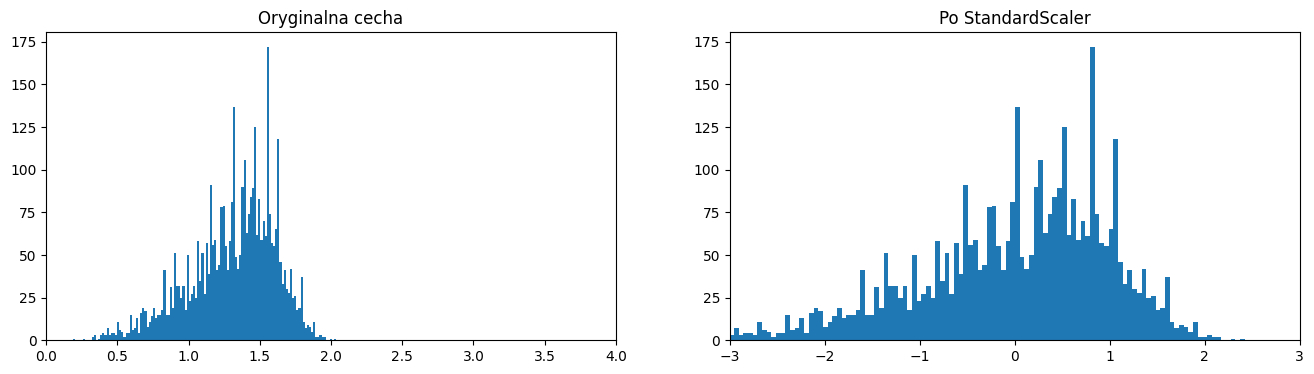

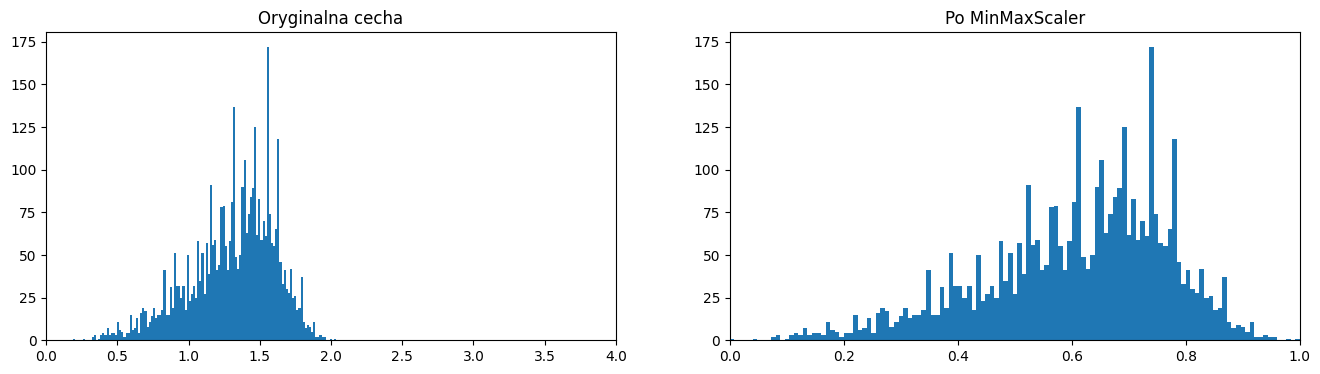

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

attrib = 'Length'
bins = 125
show_scaler(StandardScaler(), attrib, bins=bins)
show_scaler(MinMaxScaler(), attrib, bins=bins, ranges =[(0,4), (0, 1)])


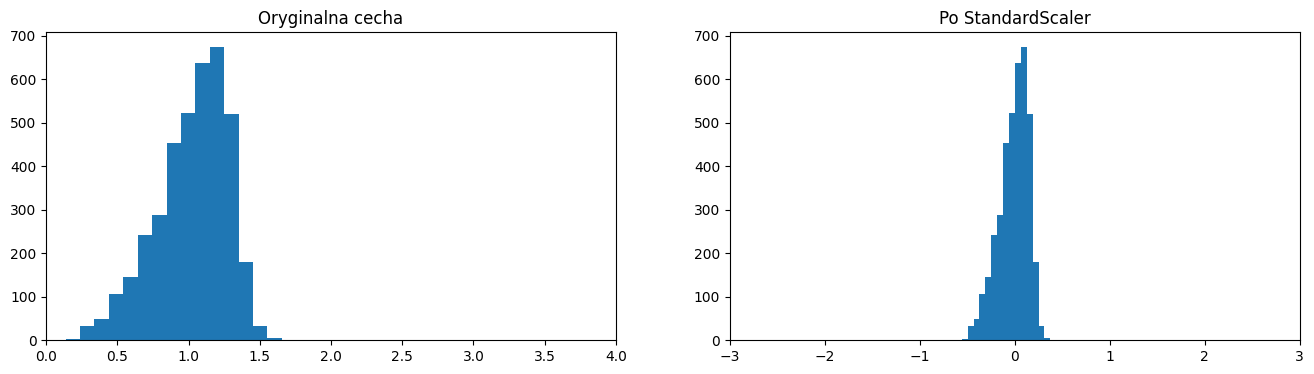

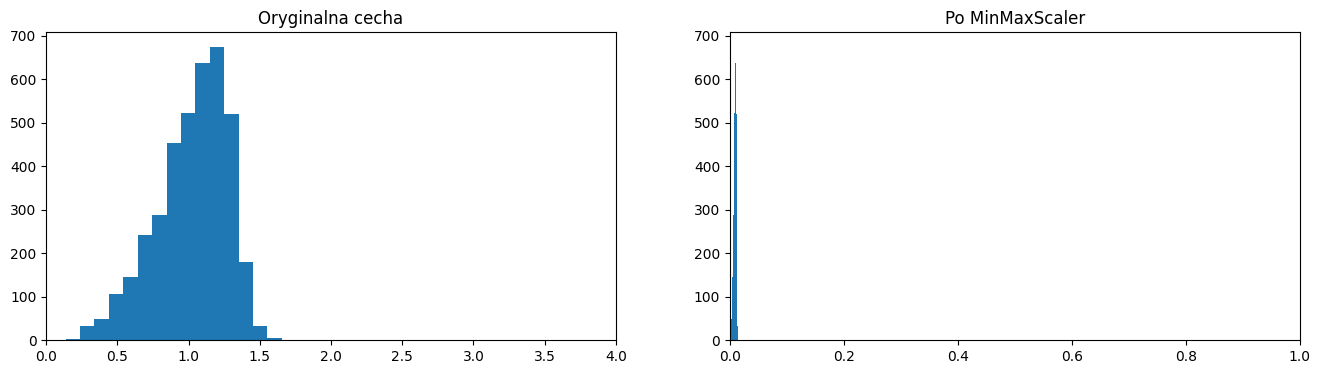

In [ ]:
attrib = 'Diameter'
bins = 1000
show_scaler(StandardScaler(), attrib, bins=bins)
show_scaler(MinMaxScaler(), attrib, bins=bins, ranges =[(0,4), (0, 1)])

In [ ]:
scaler = StandardScaler()
sgd = SGDRegressor(random_state=42)

df_scaled = pd.DataFrame(
    scaler.fit_transform(df_preprocessed),
    columns=scaler.get_feature_names_out()
)

X, y = df_scaled.drop('Age', axis=1), df_scaled['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgd.fit(X_train, y_train)

test_model(sgd, X_test, y_test)

Pierwsze 10 przykładów
[-1.22798501 -0.60697363  0.32454345 -0.29646793 -1.22798501  1.87707192
  0.94555484  0.94555484 -0.60697363 -0.29646793]
Pierwsze 10 predyckji
[ 18.15   1.28   7.92   2.64  17.61 -12.45 -15.31 -11.72   1.13   6.21] 


MAE:  8.659541269244574
-----------
RMSE:  10.770217743387201


.

.

.

.

.

In [ ]:
def test_model_better(model, X_test, y_test, transformer):
    inverse = transformer.inverse_transform(
        np.concatenate(
            [X_test, np.expand_dims(y_test, axis=1)], axis=1
        )
    )

    y_test = inverse[:, -1]

    y_pred = model.predict(X_test)
    inverse = transformer.inverse_transform(
        np.concatenate(
            [X_test, np.expand_dims(y_pred, axis=1)], axis=1
        )
    )

    y_pred = inverse[:, -1]
    print('Pierwsze 10 przykładów')
    print(y_test[:10])
    print('Pierwsze 10 predyckji')
    print(np.round(y_pred[:10], 2), '\n\n')


    print('MAE: ', np.mean(
        np.abs(y_pred - y_test)
    ))
    print('-----------')
    print('RMSE: ', np.sqrt(
        np.mean(
            (y_pred - y_test)**2)
    ))


.


.


.


.


.

In [ ]:
test_model_better(sgd, X_test, y_test, scaler)

Pierwsze 10 przykładów
[ 6.  8. 11.  9.  6. 16. 13. 13.  8.  9.]
Pierwsze 10 predyckji
[ 68.41  14.08  35.46  18.47  66.68 -30.13 -39.35 -27.8   13.59  29.96] 


MAE:  27.88851042016738
-----------
RMSE:  34.68605558018528


# Analiza danych

In [ ]:
df_preprocessed.head(0)

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age


array([[<Axes: xlabel='Length', ylabel='Length'>,
        <Axes: xlabel='Diameter', ylabel='Length'>,
        <Axes: xlabel='Height', ylabel='Length'>,
        <Axes: xlabel='Weight', ylabel='Length'>,
        <Axes: xlabel='Shucked Weight', ylabel='Length'>,
        <Axes: xlabel='Viscera Weight', ylabel='Length'>,
        <Axes: xlabel='Shell Weight', ylabel='Length'>,
        <Axes: xlabel='Age', ylabel='Length'>],
       [<Axes: xlabel='Length', ylabel='Diameter'>,
        <Axes: xlabel='Diameter', ylabel='Diameter'>,
        <Axes: xlabel='Height', ylabel='Diameter'>,
        <Axes: xlabel='Weight', ylabel='Diameter'>,
        <Axes: xlabel='Shucked Weight', ylabel='Diameter'>,
        <Axes: xlabel='Viscera Weight', ylabel='Diameter'>,
        <Axes: xlabel='Shell Weight', ylabel='Diameter'>,
        <Axes: xlabel='Age', ylabel='Diameter'>],
       [<Axes: xlabel='Length', ylabel='Height'>,
        <Axes: xlabel='Diameter', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel

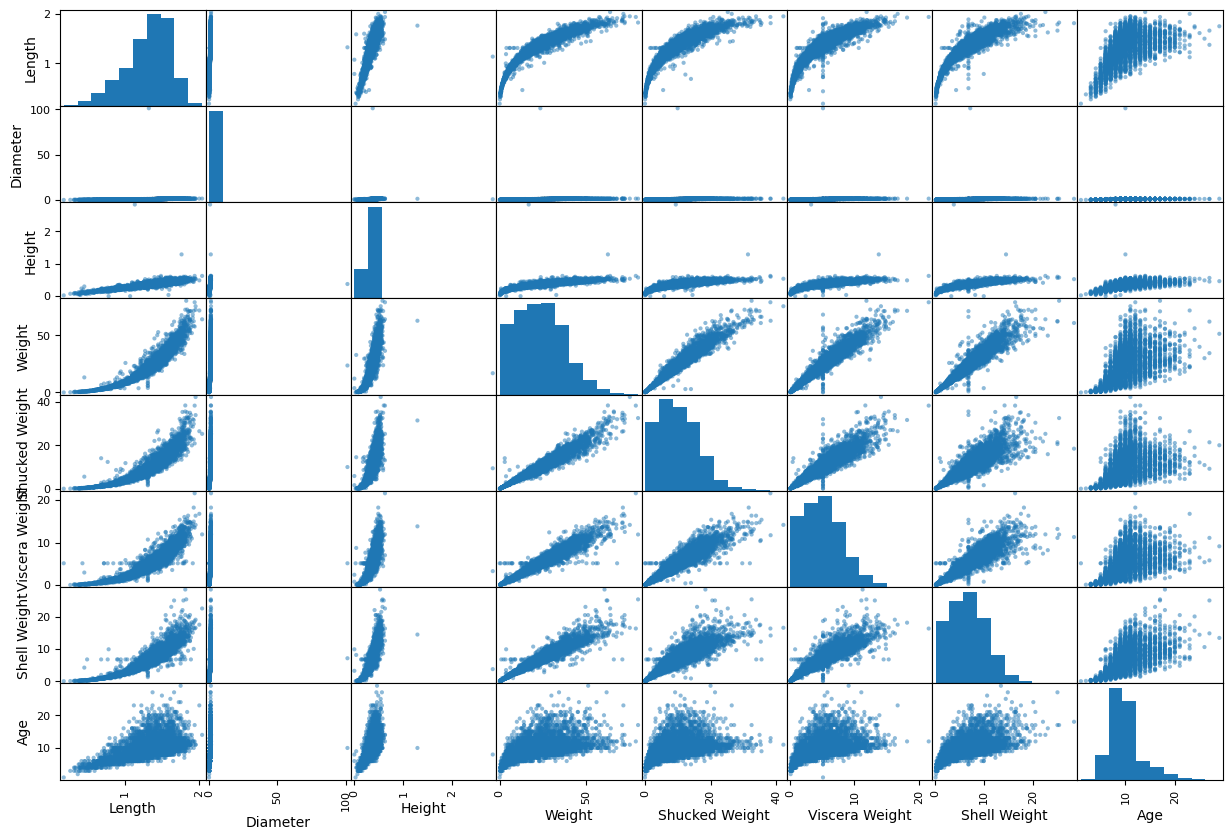

In [ ]:
from pandas.plotting import scatter_matrix
bad_attribs = ['Sex_F', 'Sex_I', 'Sex_M']
df_corr = df_preprocessed.drop(bad_attribs, axis=1)

scatter_matrix(df_corr, figsize=(15, 10))

Linie z imputera :))

In [ ]:
correlations = df_corr.corr(method='pearson')
correlations

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
Length,1.000000,0.151150,0.821757,0.924021,0.896819,0.894515,0.890967,0.553868
Diameter,0.151150,1.000000,0.130550,0.141377,0.135894,0.136338,0.138878,0.087857
Height,0.821757,0.130550,1.000000,0.814284,0.770961,0.787525,0.808269,0.551956
Weight,0.924021,0.141377,0.814284,1.000000,0.968981,0.958018,0.948945,0.538859
Shucked Weight,0.896819,0.135894,0.770961,0.968981,1.000000,0.923275,0.875191,0.418760
Viscera Weight,0.894515,0.136338,0.787525,0.958018,0.923275,1.000000,0.892511,0.497351
Shell Weight,0.890967,0.138878,0.808269,0.948945,0.875191,0.892511,1.000000,0.625100
Age,0.553868,0.087857,0.551956,0.538859,0.418760,0.497351,0.625100,1.000000


Jak zwiększyć korelacje?

.


.



.




.



.



.



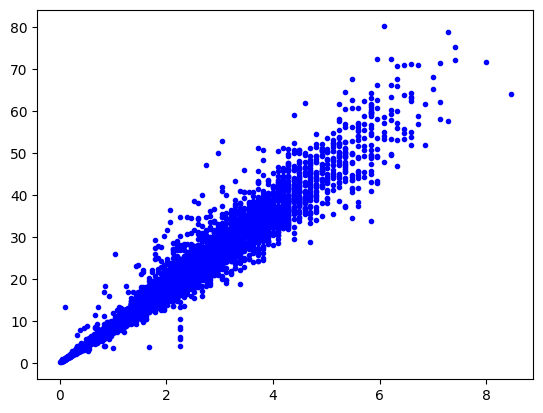

In [ ]:
length_3 = df_preprocessed['Length'] ** 3

plt.plot(length_3, df_preprocessed['Weight'], 'b.')

In [ ]:
df_sample = pd.concat([length_3, df_preprocessed['Weight']], axis=1)
df_sample.corr(method='pearson')

,Length,Weight
Length,1.000000,0.964676
Weight,0.964676,1.000000


Może wymyślmy trochę nowych cech?

In [ ]:
correlations = df_corr.corr(method='pearson')
correlations['Age']

Length            0.553868
Diameter          0.087857
Height            0.551956
Weight            0.538859
Shucked Weight    0.418760
Viscera Weight    0.497351
Shell Weight      0.625100
Age               1.000000
Name: Age, dtype: float64

In [ ]:
correlations = df_corr.corr(method='spearman')
correlations['Age']

Length            0.596557
Diameter          0.618008
Height            0.651485
Weight            0.624325
Shucked Weight    0.532223
Viscera Weight    0.600538
Shell Weight      0.684616
Age               1.000000
Name: Age, dtype: float64

Praktyczny przykład dodawania cech

In [ ]:
shell_weight_1_2 = df_preprocessed['Shell Weight'] ** 0.5
shell_weight_1_2.name = 'Shell Weight^0.5'

df_sample = pd.concat([shell_weight_1_2, df_preprocessed['Age']], axis=1)

print("korelacje pierwiastka")
print(
    df_sample.corr(method='pearson')['Age']['Shell Weight^0.5']
)

print("korelacje oryginału")
print(
    df_preprocessed.corr(method='pearson')['Age']['Shell Weight']
)

korelacje pierwiastka
0.6452071705353833
korelacje oryginału
0.6251000013959538


In [ ]:
shell_weight_div_diameter = df_preprocessed['Shell Weight'] / df_preprocessed['Diameter'] # ** 0.5
shell_weight_div_diameter.name = 'Shell Weight / Diameter'

df_sample = pd.concat([shell_weight_div_diameter, df_preprocessed['Age']], axis=1)

print("korelacje dzielenia")
print(
    df_sample.corr(method='pearson')['Age']['Shell Weight / Diameter']
)

print("korelacje oryginału")
print(
    df_preprocessed.corr(method='pearson')['Age']['Shell Weight']
)
print(
    df_preprocessed.corr(method='pearson')['Age']['Diameter']
)

korelacje dzielenia
0.6496771614942475
korelacje oryginału
0.6251000013959538
0.08785729128735992


In [ ]:
length_mul_height = (df_preprocessed['Length'] * df_preprocessed['Height']) ** 0.45
length_mul_height.name = 'Length * Height'

df_sample = pd.concat([length_mul_height, df_preprocessed['Age']], axis=1)

print("korelacje mnożenia")
print(
    df_sample.corr()['Age']['Length * Height']
)

print("korelacje oryginału")
print(
    df_preprocessed.corr(method='pearson')['Age']['Length']
)
print(
    df_preprocessed.corr(method='pearson')['Age']['Height']
)



korelacje mnożenia
0.591334011515347
korelacje oryginału
0.5538681269740118
0.5519563592563625


In [ ]:
scaler = StandardScaler()
sgd = SGDRegressor(random_state=42)

df_corr = pd.concat([shell_weight_1_2, shell_weight_div_diameter, length_mul_height, df_preprocessed], axis=1)

df_scaled = pd.DataFrame(
    scaler.fit_transform(df_corr),
    columns=scaler.get_feature_names_out()
)

X, y = df_scaled.drop('Age', axis=1), df_scaled['Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sgd.fit(X_train, y_train)
test_model_better(sgd, X_test, y_test, scaler)

Pierwsze 10 przykładów
[ 6.  8. 11.  9.  6. 16. 13. 13.  8.  9.]
Pierwsze 10 predyckji
[15.01  8.39 12.55 10.73 14.85 10.27  2.09  7.51 10.07 10.45] 


MAE:  4.383678702397514
-----------
RMSE:  5.572838082372752


# Automatyzacja

In [ ]:
df_sample = pd.DataFrame({'Sex': [
    ['F', 'M', np.nan][np.random.randint(0, 3)]  # wybieramy z listy ['A', 'B', np.nan] indeksem losowym jeden element - ten znajdzie się w końcowym dataframe
    for _ in range(10)]
})
df_sample

,Sex
0,M
1,NaN
2,F
3,F
4,M
5,F
6,M
7,M
8,F
9,M


In [ ]:
from sklearn.pipeline import Pipeline

text_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(sparse_output=False))
])

In [ ]:
text_pipeline.fit_transform(df_sample)

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [ ]:
df_sample_numbers = pd.concat([
    df_sample,
    pd.DataFrame({'Weight': [22, 13.5, 30, 32] * 2}),
], axis=1)

df_sample_numbers

,Sex,Weight
0,M,22.0
1,NaN,13.5
2,F,30.0
3,F,32.0
4,M,22.0
5,F,13.5
6,M,30.0
7,M,32.0
8,F,NaN
9,M,NaN


In [ ]:
from sklearn.compose import ColumnTransformer

text_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(sparse_output=False))
])

number_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])

ct = ColumnTransformer([
    ("text_pipe", text_pipeline, ["Sex"]),
    ("number_pipe", number_pipeline, ["Weight"])
])

ct.fit_transform(df_sample_numbers)

array([[ 0.        ,  1.        , -0.3632947 ],
       [ 0.        ,  1.        , -1.66350729],
       [ 1.        ,  0.        ,  0.86043481],
       [ 1.        ,  0.        ,  1.16636718],
       [ 0.        ,  1.        , -0.3632947 ],
       [ 1.        ,  0.        , -1.66350729],
       [ 0.        ,  1.        ,  0.86043481],
       [ 0.        ,  1.        ,  1.16636718],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ]])

In [ ]:
ct

,transformers,"[('text_pipe', ...), ('number_pipe', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


# Podsumowanie

In [ ]:
text_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot', OneHotEncoder(sparse_output=False, handle_unknown='warn'))
])

sqrt_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('sqrt', FunctionTransformer(np.sqrt, feature_names_out="one-to-one")),
    ('scaler', StandardScaler())
])


default_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])


.

.

.

In [ ]:
mul_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('multiply', FunctionTransformer(
        lambda X: (X[:, 0] * X[:, 1]).reshape(-1, 1),
        feature_names_out=lambda self, input_features: [f"{input_features[0]} * {input_features[1]}"]
    )),
    ('sqrt', FunctionTransformer(
        lambda X: X ** 0.45,
        feature_names_out="one-to-one"
    )),
    ('scaler', StandardScaler())
])

div_pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('divide', FunctionTransformer(
        lambda X: (X[:, 0] / X[:, 1]).reshape(-1, 1),
        feature_names_out=lambda self, input_features: [f"{input_features[0]} / {input_features[1]}"]
    )),
    ('scaler', StandardScaler())
])

In [ ]:
df.head(0)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age


In [ ]:
from sklearn.compose import make_column_selector

ct = ColumnTransformer([
    ('text_pipe', text_pipeline, make_column_selector(dtype_include=object)),
    ('default_pipe', default_pipeline, make_column_selector(dtype_include=np.float64)),
    ('sqrt_pipe', sqrt_pipeline, ['Shell Weight']),
    ('mul_pipeline', mul_pipeline, ['Length', 'Height']),
    ('div_pipeline', div_pipeline, ['Shell Weight', 'Diameter']),
],
    remainder=default_pipeline
)

df_analyzed = pd.DataFrame(ct.fit_transform(df), columns=ct.get_feature_names_out())

In [ ]:
ct

,transformers,"[('text_pipe', ...), ('default_pipe', ...), ...]"
,remainder,Pipeline(step...ardScaler())])
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None


In [ ]:
ct.named_transformers_['default_pipe']

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [ ]:
df_analyzed

,text_pipe__Sex_F,text_pipe__Sex_I,text_pipe__Sex_M,default_pipe__Length,default_pipe__Diameter,default_pipe__Height,default_pipe__Weight,default_pipe__Shucked Weight,default_pipe__Viscera Weight,default_pipe__Shell Weight,sqrt_pipe__Shell Weight,mul_pipeline__Length * Height,div_pipeline__Shell Weight / Diameter,remainder__Age
0,1.0,0.0,0.0,0.418904,0.078978,0.601415,7.674339e-02,0.338625,1.466185e-01,-0.011730,0.147121,0.567878,-0.141975,-0.296468
1,0.0,0.0,1.0,-1.414449,-0.244049,-1.304023,-1.308228e+00,-1.260829,-1.220795e+00,-1.334691,-1.530333,-1.434553,-1.428491,-1.227985
2,0.0,1.0,0.0,0.000000,-0.167138,-0.946754,-1.124517e+00,-1.111727,-1.147129e+00,-1.027446,-1.015644,-0.595196,-0.979161,-1.227985
3,1.0,0.0,0.0,0.000000,-0.097918,-0.946754,-2.558030e-16,-0.870002,2.884883e-16,0.000000,0.158113,-0.595196,0.593733,0.014038
4,0.0,1.0,0.0,-1.414449,-0.236358,-1.304023,-1.200043e+00,-1.075582,-1.183962e+00,-1.298545,-1.461282,-1.434553,-1.363579,-1.227985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3888,1.0,0.0,0.0,0.502239,0.055904,-0.232215,9.001135e-02,0.230187,2.340961e-01,-0.105710,0.057658,0.096925,-0.193801,-0.606974
3889,1.0,0.0,0.0,0.793908,0.102051,0.839594,7.840278e-01,0.835630,6.622761e-01,0.761806,0.806064,0.877323,0.752329,0.014038
3890,0.0,1.0,0.0,-2.289459,-0.359416,-1.780383,-1.552154e+00,-1.504814,-1.497040e+00,-1.569644,-2.089993,-2.156271,-1.820832,-1.538491
3891,0.0,1.0,0.0,0.000000,-0.167138,-0.827664,-9.520339e-01,-0.908407,-9.077170e-01,-0.973226,-0.937594,-0.510659,-0.873596,-1.227985


In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100, 80, 20), max_iter=500, random_state=42, early_stopping=True)

X, y = df_analyzed.drop('remainder__Age', axis=1), df_analyzed['remainder__Age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp.fit(X_train, y_train)
test_model_better(mlp, X_test, y_test, ct.named_transformers_['remainder'][1])

Pierwsze 10 przykładów
[ 6.  8. 11.  9.  6. 16. 13. 13.  8.  9.]
Pierwsze 10 predyckji
[ 5.95  8.03  9.69  9.    6.2  16.94 10.25 12.81  9.46  8.16] 


MAE:  1.4264152630034015
-----------
RMSE:  2.079235555345878
